In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import statsmodels.api
import math


In [2]:
data=pd.read_csv('./data/data.csv',index_col='Unnamed: 0')
data.head()

Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1     1  2010-02-05      24924.50      False    A  151315        42.31   
1      1     1  2010-02-12      46039.49       True    A  151315        38.51   
2      1     1  2010-02-19      41595.55      False    A  151315        39.93   
3      1     1  2010-02-26      19403.54      False    A  151315        46.63   
4      1     1  2010-03-05      21827.90      False    A  151315        46.50   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.548        NaN        NaN        NaN        NaN        NaN   
2       2.514        NaN        NaN        NaN        NaN        NaN   
3       2.561        NaN        NaN        NaN        NaN        NaN   
4       2.625        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [4]:
# Change date to datetime type
data.Date=pd.to_datetime(data.Date)

In [5]:
data.describe()

Store           Dept                           Date  \
count  421570.000000  421570.000000                         421570   
mean       22.200546      44.260317  2011-06-18 08:30:31.963375104   
min         1.000000       1.000000            2010-02-05 00:00:00   
25%        11.000000      18.000000            2010-10-08 00:00:00   
50%        22.000000      37.000000            2011-06-17 00:00:00   
75%        33.000000      74.000000            2012-02-24 00:00:00   
max        45.000000      99.000000            2012-10-26 00:00:00   
std        12.785297      30.492054                            NaN   

        Weekly_Sales           Size    Temperature     Fuel_Price  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean    15981.258123  136727.915739      60.090059       3.361027   
min     -4988.940000   34875.000000      -2.060000       2.472000   
25%      2079.650000   93638.000000      46.680000       2.933000   
50%      7612.030000  140167.000000      62.090000       3.452000   
75%     20205.852500  202505.000000      74.280000       3.738000   
max    693099.360000  219622.000000     100.140000       4.468000   
std     22711.183519   60980.583328      18.447931       0.458515   

           MarkDown1      MarkDown2      MarkDown3      MarkDown4  \
count  150681.000000  111248.000000  137091.000000  134967.000000   
mean     7246.420196    3334.628621    1439.421384    3383.168256   
min         0.270000    -265.760000     -29.100000       0.220000   
25%      2240.270000      41.600000       5.080000     504.220000   
50%      5347.450000     192.000000      24.600000    1481.310000   
75%      9210.900000    1926.940000     103.990000    3595.040000   
max     88646.760000  104519.540000  141630.610000   67474.850000   
std      8291.221345    9475.357325    9623.078290    6292.384031   

           MarkDown5            CPI   Unemployment  
count  151432.000000  421570.000000  421570.000000  
mean     4628.975079     171.201947       7.960289  
min       135.160000     126.064000       3.879000  
25%      1878.440000     132.022667       6.891000  
50%      3359.450000     182.318780       7.866000  
75%      5563.800000     212.416993       8.572000  
max    108519.280000     227.232807      14.313000  
std      5962.887455      39.159276       1.863296

### Negative Sales Dropping
***

In [6]:
# Checking number of observations with negative sales and dropping them (Data cleaning)
print('Percentage of Observations with Negative Sales:',round(len(data.loc[data['Weekly_Sales']<0])/data.shape[0]*100,3),'%')
print('Number of observations dropped due to negative sales:',len(data.loc[data['Weekly_Sales']<0]))
print(data.shape[0])
data.drop(data.loc[data['Weekly_Sales']<0].index,inplace=True)
print(data.shape[0])

Percentage of Observations with Negative Sales: 0.305 %
Number of observations dropped due to negative sales: 1285
421570
420285


### Store types
***

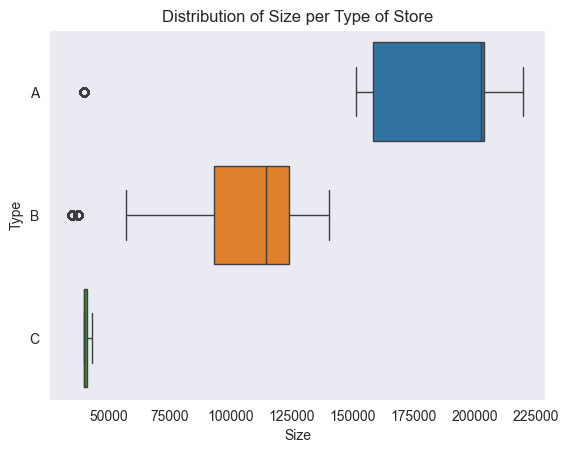

In [7]:
# Check size per type of Store 
sns.set_style('dark')
sns.boxplot(data=data,x='Size',y='Type',orient='h',hue='Type')
plt.title('Distribution of Size per Type of Store')
plt.show()

In [37]:
# Check number of sales and departments by type of store 
display(data.groupby(['Type','Size']).agg({'Weekly_Sales':'mean','Dept':'nunique'}))

Weekly_Sales  Dept
Type Size                      
A    151315  21742.767306    77
     152513  14565.978044    76
     155078  13147.663868    76
     155083  13783.028706    77
     158114  13546.210778    78
     184109  21081.960796    75
     196321  18029.713249    77
     200898  28877.084776    77
     202307  26956.456098    78
     202505  21958.644587    77
     203007  16401.610085    77
     203742  29618.846448    78
     203750  19757.985782    76
     203819  19708.509244    79
     204184  24892.840750    78
     205863  29175.540012    78
     206302  18739.753270    77
     207499  19330.714769    78
     219622  27394.392424    79
B    34875    5065.283995    72
     37392    6379.519870    72
     57197    7895.452961    76
     70713    8377.771644    76
     93188   13019.173665    76
     93638    8185.783800    77
     103681  13986.600288    73
     112238  14924.611767    75
     114533  19839.563326    77
     118221  11692.220986    74
     119557  15245.855803    76
     120653  15816.848937    78
     123737   9043.716341    78
     125833   8804.885718    73
     126512  26461.189419    77
     128107  10343.039954    76
     140167  11326.163793    77
C    39690    8287.366558    66
     39910    8321.642087    64
     41062   13457.137147    60
     42988    8783.895284    64

In [10]:
data.groupby(['Type','Store']).agg({'Dept':'nunique','Size':'unique'}).reset_index()

Type  Store  Dept      Size
0     A      1    77  [151315]
1     A      2    78  [202307]
2     A      4    78  [205863]
3     A      6    77  [202505]
4     A      8    76  [155078]
5     A     11    78  [207499]
6     A     13    79  [219622]
7     A     14    77  [200898]
8     A     19    79  [203819]
9     A     20    78  [203742]
10    A     24    77  [203819]
11    A     26    76  [152513]
12    A     27    78  [204184]
13    A     28    77  [206302]
14    A     31    76  [203750]
15    A     32    77  [203007]
16    A     33    63   [39690]
17    A     34    78  [158114]
18    A     36    61   [39910]
19    A     39    75  [184109]
20    A     40    77  [155083]
21    A     41    77  [196321]
22    B      3    72   [37392]
23    B      5    72   [34875]
24    B      7    76   [70713]
25    B      9    73  [125833]
26    B     10    77  [126512]
27    B     12    75  [112238]
28    B     15    78  [123737]
29    B     16    76   [57197]
30    B     17    76   [93188]
31    B     18    78  [120653]
32    B     21    77  [140167]
33    B     22    76  [119557]
34    B     23    77  [114533]
35    B     25    76  [128107]
36    B     29    77   [93638]
37    B     35    73  [103681]
38    B     45    74  [118221]
39    C     30    64   [42988]
40    C     37    62   [39910]
41    C     38    63   [39690]
42    C     42    62   [39690]
43    C     43    60   [41062]
44    C     44    60   [39910]

In [9]:
# Check stores of type C to check if change OK
data.loc[data.Type=='C','Store'].unique()

array([30, 37, 38, 42, 43, 44], dtype=int64)

In [11]:
# Change 2 A type of stores to C type (More addecuate based on size and number of departments included in store)
data.loc[(data.Size < 40000) & (data.Type=='A'),'Type']='C'
display(data.groupby(['Type','Size']).agg({'Weekly_Sales':'mean','Dept':'nunique','Temperature':'mean'}))

Weekly_Sales  Dept  Temperature
Type Size                                   
A    151315  21742.767306    77    68.232414
     152513  14565.978044    76    43.622255
     155078  13147.663868    76    62.448457
     155083  13783.028706    77    47.589667
     158114  13546.210778    78    58.413646
     184109  21081.960796    75    70.585681
     196321  18029.713249    77    48.392952
     200898  28877.084776    77    57.784621
     202307  26956.456098    78    68.111425
     202505  21958.644587    77    69.659611
     203007  16401.610085    77    52.691154
     203742  29618.846448    78    55.339433
     203750  19757.985782    76    68.815082
     203819  19708.509244    79    53.095120
     204184  24892.840750    78    57.304597
     205863  29175.540012    78    62.175089
     206302  18739.753270    77    70.166045
     207499  19330.714769    78    72.457993
     219622  27394.392424    79    53.593445
B    34875    5065.283995    72    69.197526
     37392    6379.519870    72    71.292962
     57197    7895.452961    76    44.987324
     70713    8377.771644    76    39.614441
     93188   13019.173665    76    46.354566
     93638    8185.783800    77    54.866579
     103681  13986.600288    73    57.298708
     112238  14924.611767    75    70.154299
     114533  19839.563326    77    48.777486
     118221  11692.220986    74    57.771264
     119557  15245.855803    76    54.851651
     120653  15816.848937    78    53.268848
     123737   9043.716341    78    51.743997
     125833   8804.885718    73    67.649640
     126512  26461.189419    77    72.132019
     128107  10343.039954    76    52.110258
     140167  11326.163793    77    68.773275
C    39690    8287.366558    66    73.013125
     39910    8321.642087    64    65.195725
     41062   13457.137147    60    68.870951
     42988    8783.895284    64    68.794062

In [12]:
# Check change --> OK
data.loc[data.Type=='C','Store'].unique()

array([30, 33, 36, 37, 38, 42, 43, 44], dtype=int64)

### Fill NA Markdowns
***

In [13]:
# Check first date of each Markdown feature
for markdown in ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']:
    print(f'First date for {markdown}: {data.loc[data[markdown].notna()]['Date'].min()}')

First date for MarkDown1: 2011-11-11 00:00:00
First date for MarkDown2: 2011-11-11 00:00:00
First date for MarkDown3: 2011-11-11 00:00:00
First date for MarkDown4: 2011-11-11 00:00:00
First date for MarkDown5: 2011-11-11 00:00:00


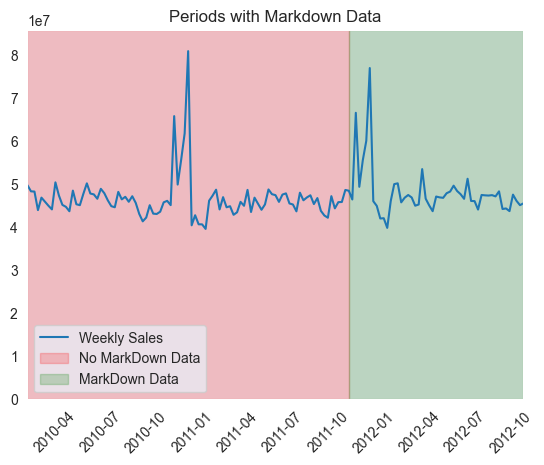

In [14]:
# Plot to visualize the period where Markdown data included 
# Just 1 year of data for a period of almost 3 years
data_agg=data.groupby('Date').agg({'Weekly_Sales':'sum'}).reset_index()

x1=[data_agg.Date.min(),data.loc[data['MarkDown1'].notna()]['Date'].min()]
y1=[data_agg.Weekly_Sales.max()+5e6,data_agg.Weekly_Sales.max()+5e6]

x2=[data.loc[data['MarkDown1'].notna()]['Date'].min(),data_agg.Date.max()]
y2=[data_agg.Weekly_Sales.max()+5e6,data_agg.Weekly_Sales.max()+5e6]

plt.plot(data_agg['Date'],data_agg['Weekly_Sales'],label='Weekly Sales')
plt.fill_between(x1,y1,color='red',alpha=0.2,label='No MarkDown Data')
plt.fill_between(x2,y2,color='green',alpha=0.2,label='MarkDown Data')
plt.xlim(data_agg.Date.min(),data_agg.Date.max())
plt.ylim(0,data_agg.Weekly_Sales.max()+5e6)
plt.xticks(rotation=45)
plt.title('Periods with Markdown Data')
plt.legend()
plt.show()

In [15]:
# From now on missing value filling just for period where data available
# Check missing values percentage
data.loc[data.Date>='2011-11-11'][['MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5']].isna().sum()\
    /data.loc[data.Date>='2011-11-11'].shape[0]

MarkDown1    0.004955
MarkDown2    0.265191
MarkDown3    0.094609
MarkDown4    0.108733
MarkDown5    0.000000
dtype: float64

In [16]:
# Check if markdown values are the same for all departments within a store
# Correct--> Max 2 unique values within a same date and same store (2 values: x and NaN)
Stores_unique=[]
for store in data.Store.unique():
    df_markdowns=data.loc[(data.Date>='2011-11-11') & (data.Store==store)]
    df_markdowns=df_markdowns.groupby('Date').agg(MarkDown1nunique=('MarkDown1','nunique'),MarkDown2nunique=('MarkDown2','nunique'),
                                               MarkDown3nunique=('MarkDown3','nunique'),MarkDown4nunique=('MarkDown4','nunique'),
                                               MarkDown5nunique=('MarkDown5','nunique'))
    stores_unique.extend(df_markdowns[['MarkDown1nunique','MarkDown2nunique','MarkDown3nunique','MarkDown4nunique','MarkDown5nunique']].nunique().values)
print(max(stores_unique))

2


In [17]:
# Check missing values by type of store
# More percentage in C type
print('Missing Values by type of Store:')
for type in ['A','B','C']:
    print('\n')
    print('Type:',type)
    missing_values_type=data.loc[(data.Date>='2011-11-11') & (data.Type==type)]
    for markdown in ['MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5']:
        print(markdown, ':', round(missing_values_type[markdown].isna().sum()/missing_values_type.shape[0]*100,2),'%')


Missing Values by type of Store:


Type: A
MarkDown1 : 0.0 %
MarkDown2 : 16.91 %
MarkDown3 : 3.28 %
MarkDown4 : 0.49 %
MarkDown5 : 0.0 %


Type: B
MarkDown1 : 0.0 %
MarkDown2 : 24.79 %
MarkDown3 : 9.72 %
MarkDown4 : 0.66 %
MarkDown5 : 0.0 %


Type: C
MarkDown1 : 3.71 %
MarkDown2 : 66.07 %
MarkDown3 : 30.92 %
MarkDown4 : 77.83 %
MarkDown5 : 0.0 %


A


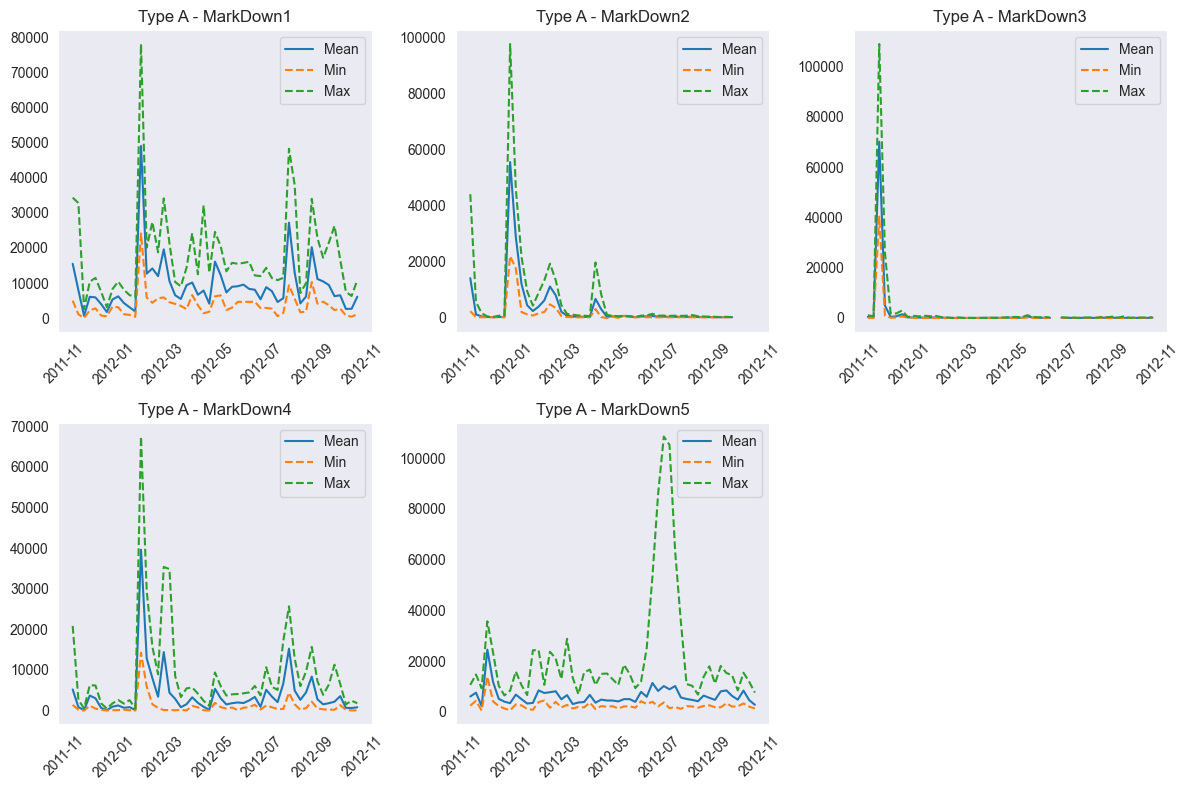

B


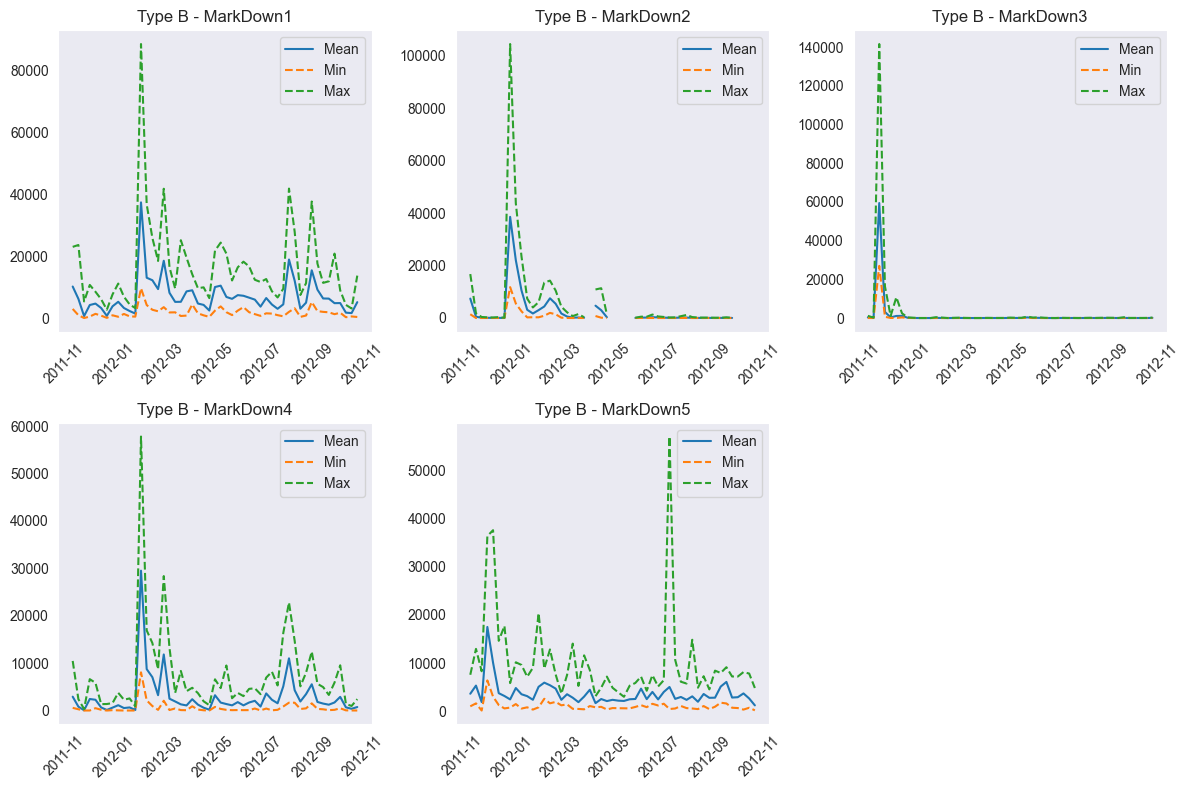

C


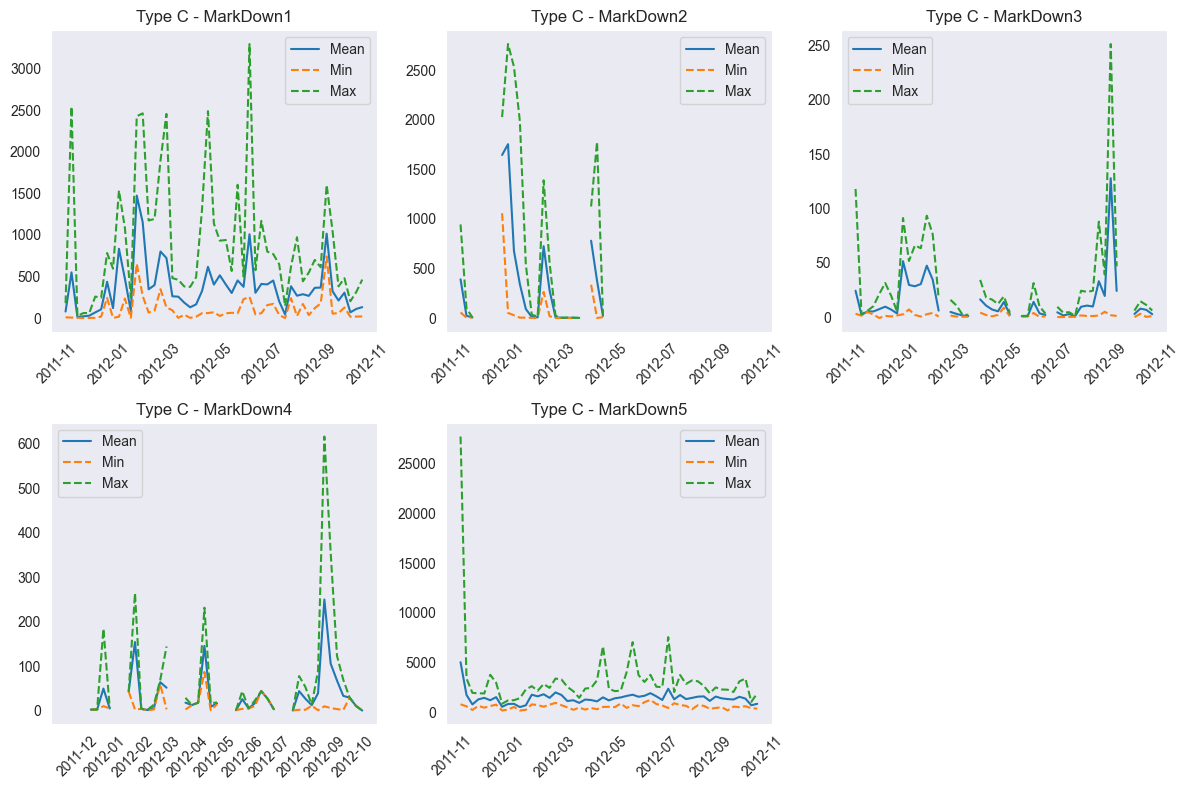

In [18]:
# Plot mean, min and max Markdown evolution by type of Store to identify if similar trend between stores
# Correct
for type in ['A','B','C']:  
    print(type)  
    df_markdowns_all=data.loc[(data.Date>='2011-11-11') & (data.Type==type)]
    df_markdowns_all=df_markdowns_all.groupby('Date').agg(MarkDown1=('MarkDown1','mean'),MarkDown2=('MarkDown2','mean'),MarkDown3=('MarkDown3','mean'),
                                                MarkDown4=('MarkDown4','mean'),MarkDown5=('MarkDown5','mean'),IsHoliday=('IsHoliday','mean'),
                                                MarkDown1min=('MarkDown1','min'),MarkDown2min=('MarkDown2','min'),
                                                MarkDown3min=('MarkDown3','min'),MarkDown4min=('MarkDown4','min'),
                                                MarkDown5min=('MarkDown5','min'),
                                                MarkDown1max=('MarkDown1','max'),MarkDown2max=('MarkDown2','max'),
                                                MarkDown3max=('MarkDown3','max'),MarkDown4max=('MarkDown4','max'),
                                                MarkDown5max=('MarkDown5','max'))
    plt.figure(figsize=(12,8))
    for i,markdown in enumerate(['MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5']):
        plt.subplot(2,3,i+1)
        plt.title(f'Type {type} - {markdown}')
        plt.xticks(rotation=45)
        plt.plot(df_markdowns_all[markdown],label='Mean')
        plt.plot(df_markdowns_all[f'{markdown}min'],'--',label='Min')
        plt.plot(df_markdowns_all[f'{markdown}max'],'--',label='Max')
        plt.legend()
        plt.tight_layout()
    plt.show()

In [19]:
# Create dataframe to fill missing values (Mean MarkDown by type of store and Date + 0 if no value)
markdown_fillna=data.loc[(data.Date>='2011-11-11')].groupby(['Type','Date']).agg({'MarkDown1':'mean','MarkDown2':'mean','MarkDown3':'mean',
                                                       'MarkDown4':'mean','MarkDown5':'mean','IsHoliday':'mean'}).reset_index().fillna(0)
markdown_fillna.loc[markdown_fillna.Type=='C']

Type       Date    MarkDown1    MarkDown2   MarkDown3   MarkDown4  \
102    C 2011-11-11    78.283686   390.660335   24.279244    0.000000   
103    C 2011-11-18   549.337494    22.720536    1.954110   38.350000   
104    C 2011-11-25    12.722245     6.000000    5.240000    0.000000   
105    C 2011-12-02    20.962108     0.000000    5.160101    0.000000   
106    C 2011-12-09    28.668543     0.000000    7.312960    0.000000   
107    C 2011-12-16    67.805797     0.000000    9.587052    2.280000   
108    C 2011-12-23   104.299370     0.000000    6.902997    2.520000   
109    C 2011-12-30   436.738463  1645.364055    3.305298   49.511688   
110    C 2012-01-06   119.774484  1754.457053   51.442972    4.920000   
111    C 2012-01-13   833.278287   676.404584   29.557985    0.000000   
112    C 2012-01-20   473.856266   340.803368   28.368299    0.000000   
113    C 2012-01-27    83.449479    91.438524   30.392955   42.840000   
114    C 2012-02-03  1473.836777    10.439514   47.334757  154.091751   
115    C 2012-02-10  1153.001272     7.333031   34.440150    3.970000   
116    C 2012-02-17   346.170886   725.203165    5.991038    1.275294   
117    C 2012-02-24   397.190865   280.146107    0.000000    6.402680   
118    C 2012-03-02   800.850744     9.143029    4.737276   63.885652   
119    C 2012-03-09   722.340303     1.723382    2.955201   51.537340   
120    C 2012-03-16   261.967620     2.212851    1.546497    0.000000   
121    C 2012-03-23   257.218764     2.350933    0.922980    0.000000   
122    C 2012-03-30   185.491859     0.708661    0.000000   17.915226   
123    C 2012-04-06   129.776667     0.000000   16.251320   12.410000   
124    C 2012-04-13   164.123384   780.519491   10.563488   17.820000   
125    C 2012-04-20   325.094697   376.403813    7.002288  145.531257   
126    C 2012-04-27   616.305570    21.772581    5.309073    8.735000   
127    C 2012-05-04   402.982292     0.000000   13.903725   16.222935   
128    C 2012-05-11   514.029289     0.000000    2.413201    0.000000   
129    C 2012-05-18   404.333204     0.000000    0.000000    0.000000   
130    C 2012-05-25   301.745575     0.000000    0.814094    0.920000   
131    C 2012-06-01   452.792751     0.000000    0.831126   25.763548   
132    C 2012-06-08   375.935278     0.000000   13.971705    5.000000   
133    C 2012-06-15  1008.369744     0.000000    3.418907   16.795152   
134    C 2012-06-22   303.982932     0.000000    1.935347   43.890000   
135    C 2012-06-29   410.272986     0.000000    0.000000   26.870000   
136    C 2012-07-06   404.733965     0.000000    4.412778    2.960000   
137    C 2012-07-13   451.577825     0.000000    1.492125    0.000000   
138    C 2012-07-20   201.264010     0.000000    2.713948    0.000000   
139    C 2012-07-27    43.432660     0.000000    0.784933    0.410000   
140    C 2012-08-03   382.305510     0.000000    9.475642   43.754966   
141    C 2012-08-10   269.223241     0.000000   10.592848   26.677787   
142    C 2012-08-17   286.675013     0.000000    9.720567   12.187075   
143    C 2012-08-24   266.931304     0.000000   33.011171   39.094976   
144    C 2012-08-31   363.762069     0.000000   19.438409  249.722231   
145    C 2012-09-07   366.840932     0.000000  127.798519  105.467598   
146    C 2012-09-14  1015.511212     0.000000   24.037650   67.646316   
147    C 2012-09-21   322.598006     0.000000    0.000000   33.049515   
148    C 2012-09-28   211.075338     0.000000    0.000000   29.210000   
149    C 2012-10-05   305.305071     0.000000    2.848893   10.640000   
150    C 2012-10-12    68.840500     0.000000    7.777760    0.220000   
151    C 2012-10-19   110.036055     0.000000    6.639613    0.000000   
152    C 2012-10-26   131.273208     4.860781    2.650769    0.000000   

       MarkDown5  IsHoliday  
102  5017.504149        0.0  
103  1723.879948        0.0  
104   769.307755        1.0  
105  1279.963595        0.0  
106  1429.121269        0.0  
107  1191.529196        0.0

In [20]:
# Fill NaN values 
for type in ['A','B','C']:
    for date in markdown_fillna['Date'].unique():
        for markdown in ['MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4']:
            data.loc[(data['Date']==date) & (data['Type']==type) & (data[markdown].isna()),markdown] =\
                markdown_fillna.loc[(markdown_fillna.Date== date) & (markdown_fillna.Type==type)][markdown].values[0]

In [21]:
# Check if filling OK
print('Missing Values by type of Store:')
for type in ['A','B','C']:
    print('\n')
    print('Type:',type)
    missing_values_type=data.loc[(data.Date>='2011-11-11') & (data.Type==type)]
    for markdown in ['MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5']:
        print(markdown, ':', round(missing_values_type[markdown].isna().sum()/missing_values_type.shape[0]*100,2),'%')

Missing Values by type of Store:


Type: A
MarkDown1 : 0.0 %
MarkDown2 : 0.0 %
MarkDown3 : 0.0 %
MarkDown4 : 0.0 %
MarkDown5 : 0.0 %


Type: B
MarkDown1 : 0.0 %
MarkDown2 : 0.0 %
MarkDown3 : 0.0 %
MarkDown4 : 0.0 %
MarkDown5 : 0.0 %


Type: C
MarkDown1 : 0.0 %
MarkDown2 : 0.0 %
MarkDown3 : 0.0 %
MarkDown4 : 0.0 %
MarkDown5 : 0.0 %


A


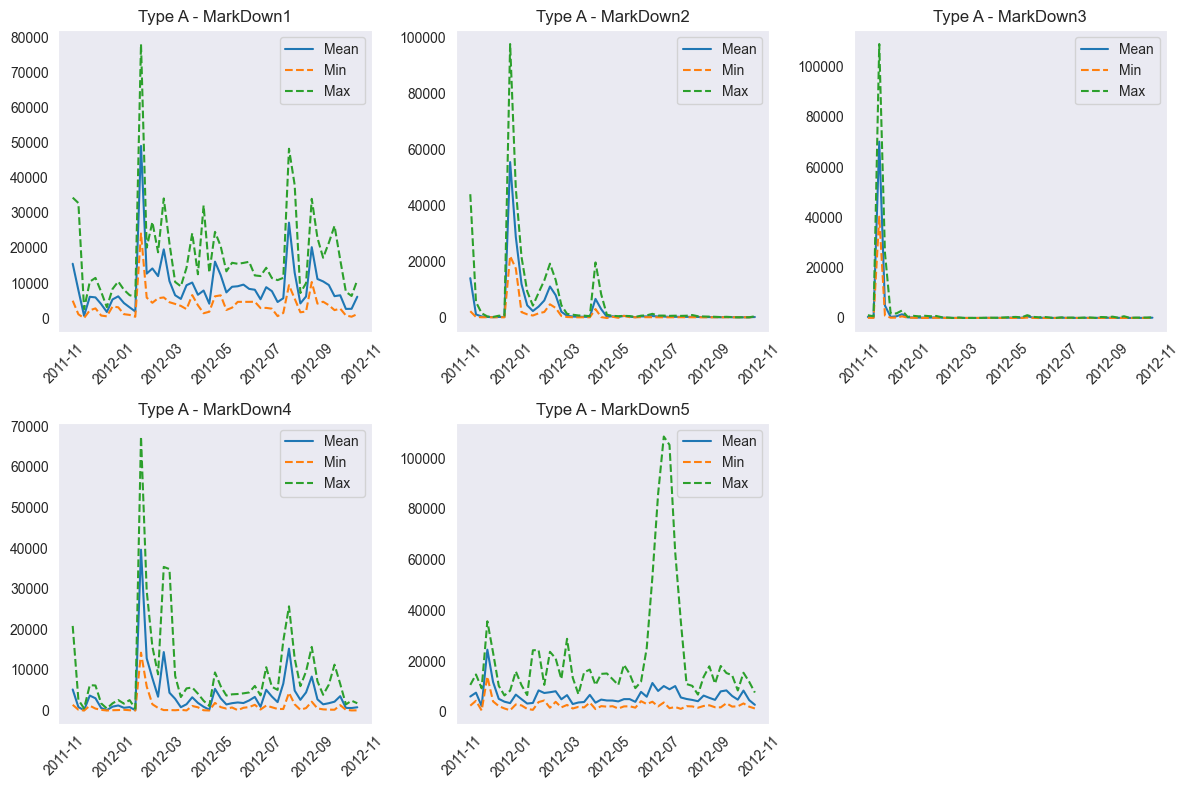

B


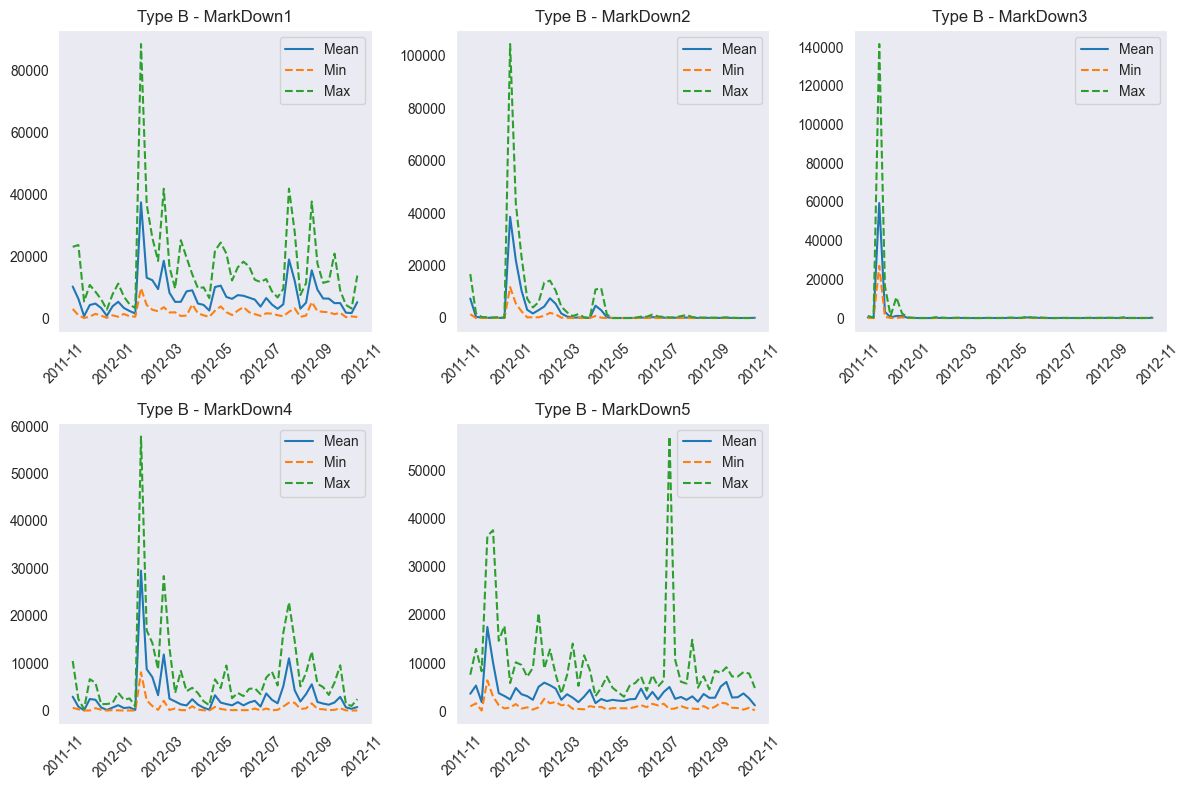

C


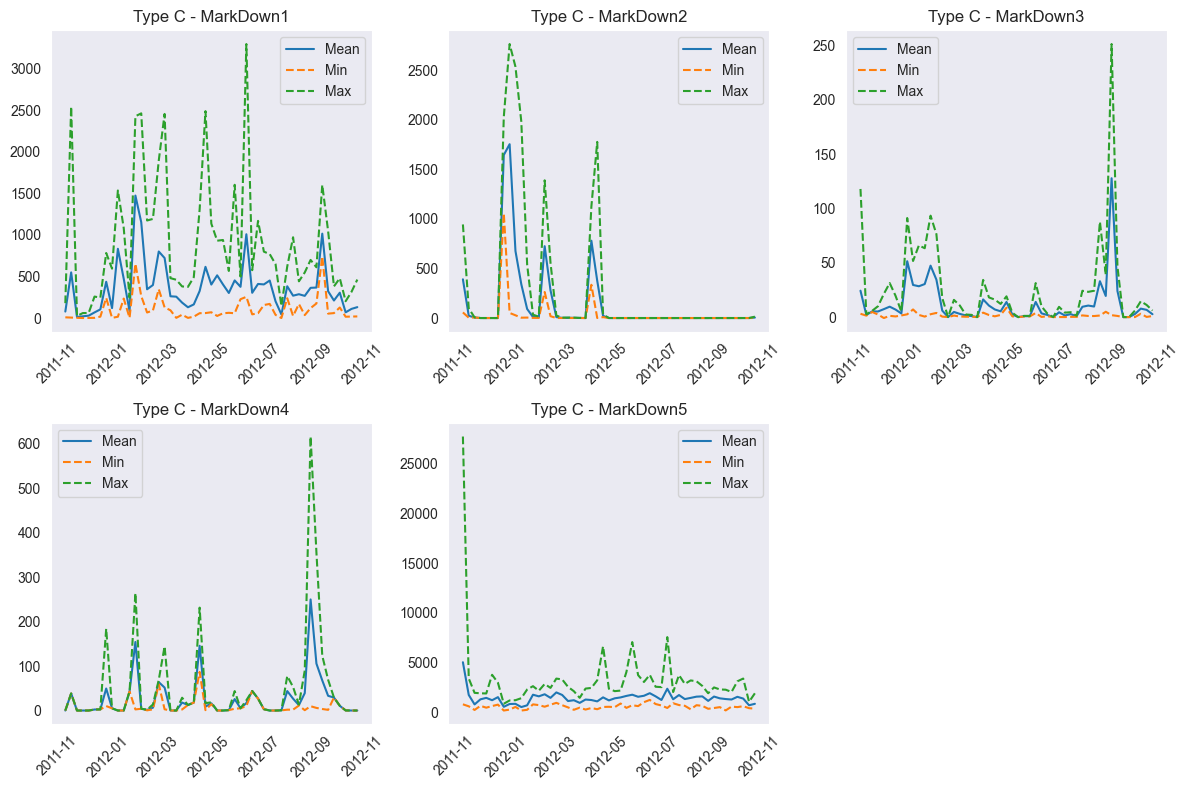

In [22]:
# Replot mean, min and max Markdown evolution by type of Store to check
for type in ['A','B','C']:  
    print(type)  
    df_markdowns_all=data.loc[(data.Date>='2011-11-11') & (data.Type==type)]
    df_markdowns_all=df_markdowns_all.groupby('Date').agg(MarkDown1=('MarkDown1','mean'),MarkDown2=('MarkDown2','mean'),MarkDown3=('MarkDown3','mean'),
                                                MarkDown4=('MarkDown4','mean'),MarkDown5=('MarkDown5','mean'),IsHoliday=('IsHoliday','mean'),
                                                MarkDown1min=('MarkDown1','min'),MarkDown2min=('MarkDown2','min'),
                                                MarkDown3min=('MarkDown3','min'),MarkDown4min=('MarkDown4','min'),
                                                MarkDown5min=('MarkDown5','min'),
                                                MarkDown1max=('MarkDown1','max'),MarkDown2max=('MarkDown2','max'),
                                                MarkDown3max=('MarkDown3','max'),MarkDown4max=('MarkDown4','max'),
                                                MarkDown5max=('MarkDown5','max'))
    plt.figure(figsize=(12,8))
    for i,markdown in enumerate(['MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5']):
        plt.subplot(2,3,i+1)
        plt.title(f'Type {type} - {markdown}')
        plt.xticks(rotation=45)
        plt.plot(df_markdowns_all[markdown],label='Mean')
        plt.plot(df_markdowns_all[f'{markdown}min'],'--',label='Min')
        plt.plot(df_markdowns_all[f'{markdown}max'],'--',label='Max')
        plt.legend()
        plt.tight_layout()
    plt.show()

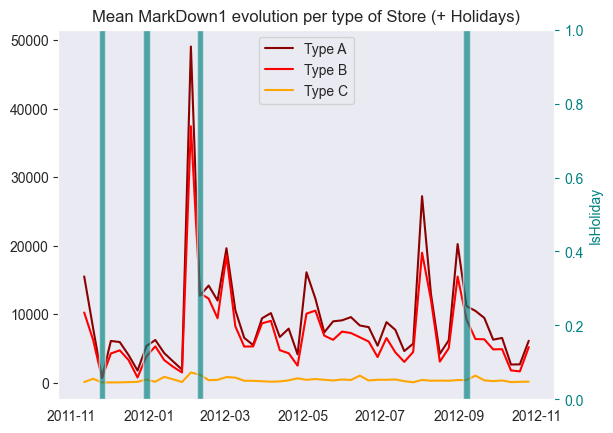

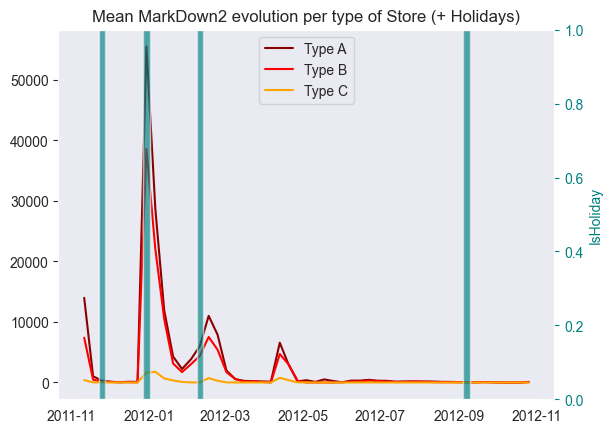

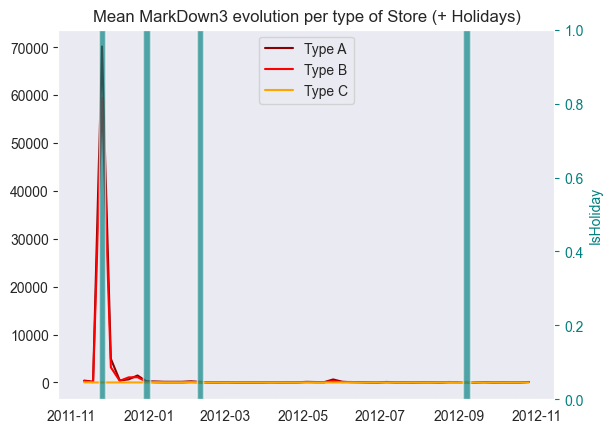

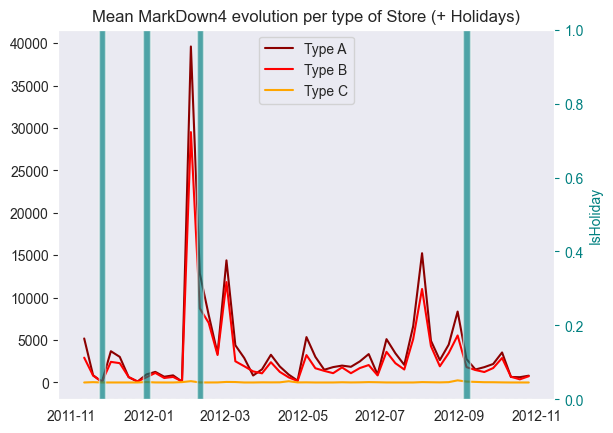

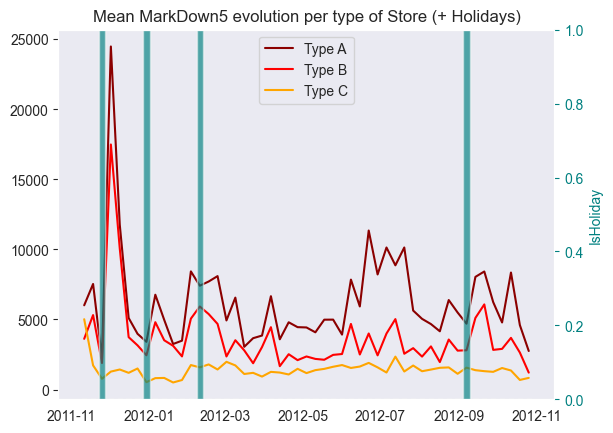

In [23]:
# Plot mean Markdown evolution by Type of store and Holiday periods to check correlation
for markdown in ['MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5']:
    fig,ax=plt.subplots()
    ax.plot(markdown_fillna.loc[markdown_fillna.Type=='A']['Date'],
            markdown_fillna.loc[markdown_fillna.Type=='A'][markdown],color='darkred',label='Type A')
    ax.plot(markdown_fillna.loc[markdown_fillna.Type=='B']['Date'],
            markdown_fillna.loc[markdown_fillna.Type=='B'][markdown],color='red',label='Type B')
    ax.plot(markdown_fillna.loc[markdown_fillna.Type=='C']['Date'],
            markdown_fillna.loc[markdown_fillna.Type=='C'][markdown],color='orange',label='Type C')
    plt.legend(loc='upper center')

    ax2=ax.twinx()
    ax2.bar(markdown_fillna.Date, markdown_fillna['IsHoliday'],color='teal',label='Holiday',alpha=0.3,width=5)
    ax2.set_ylabel('IsHoliday',color='teal')
    ax2.tick_params('y',colors='teal')
    ax2.set_ylim(0,1)
    plt.title(f'Mean {markdown} evolution per type of Store (+ Holidays)')


### By Department
***

In [24]:
# Check general values for each department (Sales and Percentage of total sales)
# Top ones
print(data.Dept.nunique())
departments_total_sales=data.groupby('Dept').agg(total_sales=('Weekly_Sales','sum')).sort_values('total_sales',ascending=False)
departments_total_sales['total_sales']=departments_total_sales['total_sales'].astype('int')
departments_total_sales['percentage']=round(departments_total_sales['total_sales']/departments_total_sales['total_sales'].sum()*100,2)
departments_total_sales.head(20)

81


total_sales  percentage
Dept                         
92      483943341        7.18
95      449320162        6.67
38      393118136        5.83
72      305728199        4.54
90      291068463        4.32
40      288936022        4.29
2       280611174        4.17
91      216781705        3.22
13      197321569        2.93
8       194280780        2.88
94      189913098        2.82
4       167146745        2.48
93      159698681        2.37
7       155477562        2.31
79      141396544        2.10
23      138180363        2.05
5       135607358        2.01
9       128393466        1.91
46      128344411        1.90
1       123638776        1.84

In [25]:
departments=list(data['Dept'].unique())

# Function that takes a discrete variable name and a list of the number of departments
# Returns list with ANOVA test result for each department (Correlation to Weekly_Sales)
def qual_quan_stat_test(var,departments=departments):
    anova_list=[]
    for d in departments:
        x=data.loc[data['Dept']==d].groupby('Date').agg({'Weekly_Sales':'mean',var:'mean'})
        result=statsmodels.formula.api.ols(f'Weekly_Sales ~ {var}',data=x).fit()
        anova=statsmodels.api.stats.anova_lm(result)
        anova_list.append(round(anova['PR(>F)'].iloc[0],6))
    return anova_list

# Function that takes a continuous variable name and a list of the number of departments
# Returns lists with Pearson and Spearman test results for each department and the category of the result (Correlation to Weekly_Sales)
def quan_quan_stat_test(var,departments=departments):
    pearson_list=[]
    spearman_list=[]
    test_list=[]
    for d in departments:
        x=data.loc[data['Dept']==d].groupby('Date').agg({'Weekly_Sales':'mean',var:'mean'})
        pearson_list.append(round(pearsonr(x['Weekly_Sales'],x[var])[1],6))
        spearman_list.append(round(spearmanr(x['Weekly_Sales'],x[var])[1],6))
        if pearsonr(x['Weekly_Sales'],x[var])[1] < 0.01:
            test_list.append('Linear')
        elif spearmanr(x['Weekly_Sales'],x[var])[1] < 0.01:
            test_list.append('Monotonic')
        else:
            test_list.append('No relation')
    return pearson_list, spearman_list, test_list



In [26]:
# Check 
a=pd.DataFrame(list(zip(departments,qual_quan_stat_test('IsHoliday'))),columns=['Dept','Anova_p_value'])
a.sort_values(by='Anova_p_value')


Dept  Anova_p_value
56    72       0.000000
55    71       0.000001
57    74       0.000002
20    22       0.000083
36    38       0.000166
..   ...            ...
0      1       0.858039
2      3       0.869403
35    37       0.885865
48    54       0.951423
60    79       0.996002

[81 rows x 2 columns]

In [27]:
# Function that takes a discrete variable and displays box plots of departments with a p-value < 0.01 in ANOVA test (Correlation to Weekly_Sales)
def boxplot_anova(var):
    x=pd.DataFrame(list(zip(departments,qual_quan_stat_test('IsHoliday'))),columns=['Dept','anova_p_value'])
    
    x2=x.loc[x['anova_p_value'] < 0.01]
    nrows=math.ceil(x2.shape[0]/3)    # Number of rows in subplot
    depts=x2['Dept'].unique()         # Departments with p-value < 0.01
    i=1

    sns.set_style('dark')
    plt.figure(figsize=(12,4*nrows))
    plt.suptitle(f'Weekly_Sales - {var} boxplot by Department (Anova p-value < 0.01)',va='center',fontsize='xx-large',fontweight='bold')

    for d in depts:
        x3=data.loc[data['Dept']==d].groupby('Date').agg({'Weekly_Sales':'mean',var:'mean'})
        plt.subplot(nrows,3,i)

        sns.boxplot(data=x3,x=var,y='Weekly_Sales',hue=var)
        plt.annotate(f'Department: {d}',xy=(0.62, 0.95), xycoords='axes fraction',fontweight='bold')
        if ((i-1)%3) != 0:
            plt.ylabel('')
        i+=1
    plt.show()

# Function that takes a continuous variable and displays regression plots of departments with a p-value < 0.01 in Pearson test (Correlation to Weekly_Sales)
def scatter_regression_pearson(var):
    # Calculate p-values for pearson test between var and Weekly_Price by Department
    x=pd.DataFrame(list(zip(departments,*quan_quan_stat_test(var))),    
             columns=['Dept','Pears_p_val','Spear_p_val','Correlation'])
    
    # Locate p-values < 0.01
    x2=x.loc[x['Correlation']=='Linear']

    nrows=math.ceil(x2.shape[0]/3)    # Number of rows in subplot
    depts=x2['Dept'].unique()         # Departments with p-value < 0.01
    i=1

    sns.set_style('dark')
    plt.figure(figsize=(12,4*nrows))
    plt.suptitle(f'Weekly_Sales - {var} regression by Department (Pearson p-value < 0.01)',va='center',fontsize='xx-large',fontweight='bold')

    for d in depts:
        x3=data.loc[data['Dept']==d].groupby('Date').agg({'Weekly_Sales':'mean',var:'mean'})
        plt.subplot(nrows,3,i)
        sns.regplot(x=x3[var], y=x3['Weekly_Sales'], ci=None, scatter_kws={'s': 20,'color':'teal'},line_kws={'color': 'red'})
        plt.annotate(f'Department: {d}',xy=(0.62, 0.95), xycoords='axes fraction',fontweight='bold')
        if ((i-1)%3) != 0:
            plt.ylabel('')
        i+=1
    
    plt.show()


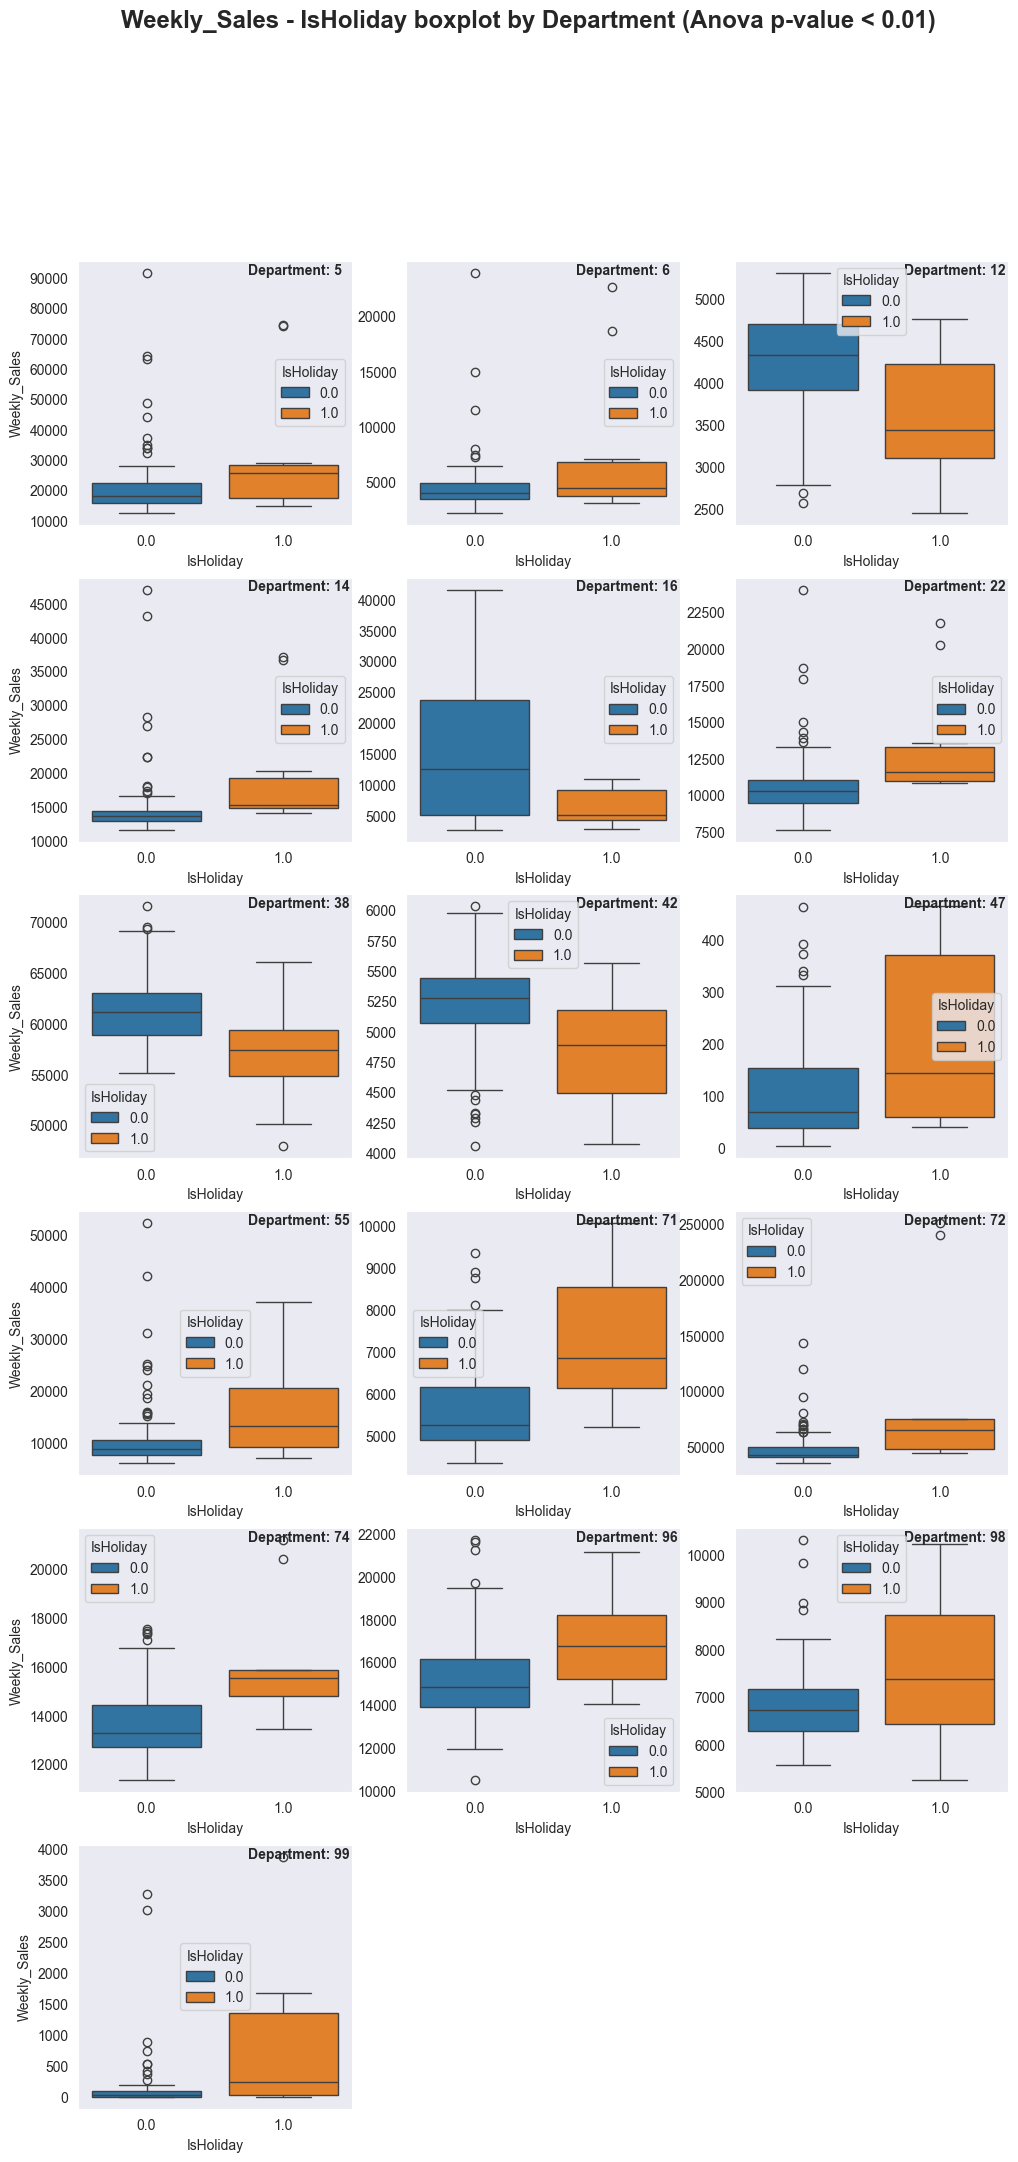

In [28]:
# Plot departments (box plot) where IsHoliday is correlated to Weekly_Sales (p-value < 0.01)
boxplot_anova('IsHoliday')

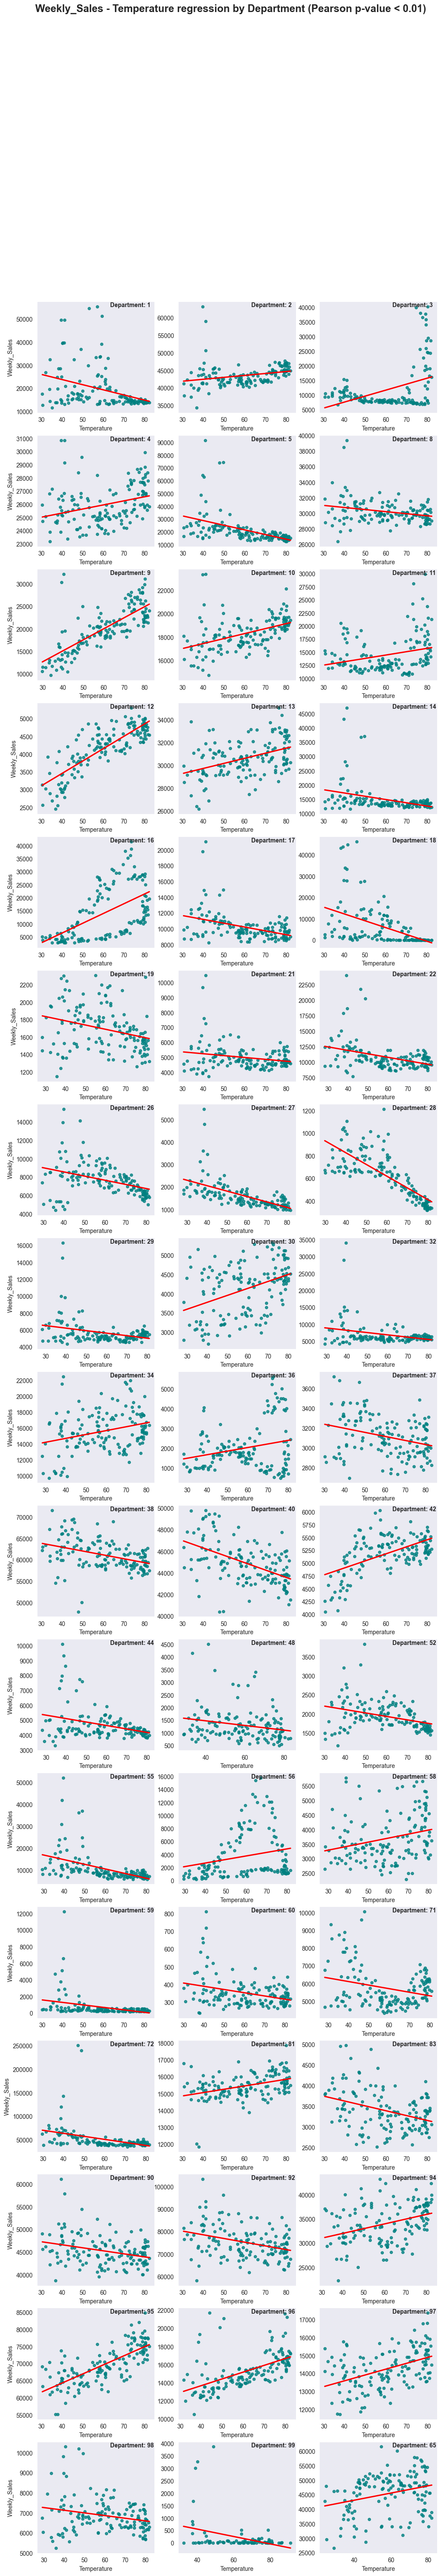

In [29]:
# Plot departments (regression plot) where Temperature is correlated to Weekly_Sales (p-value < 0.01)
scatter_regression_pearson('Temperature')

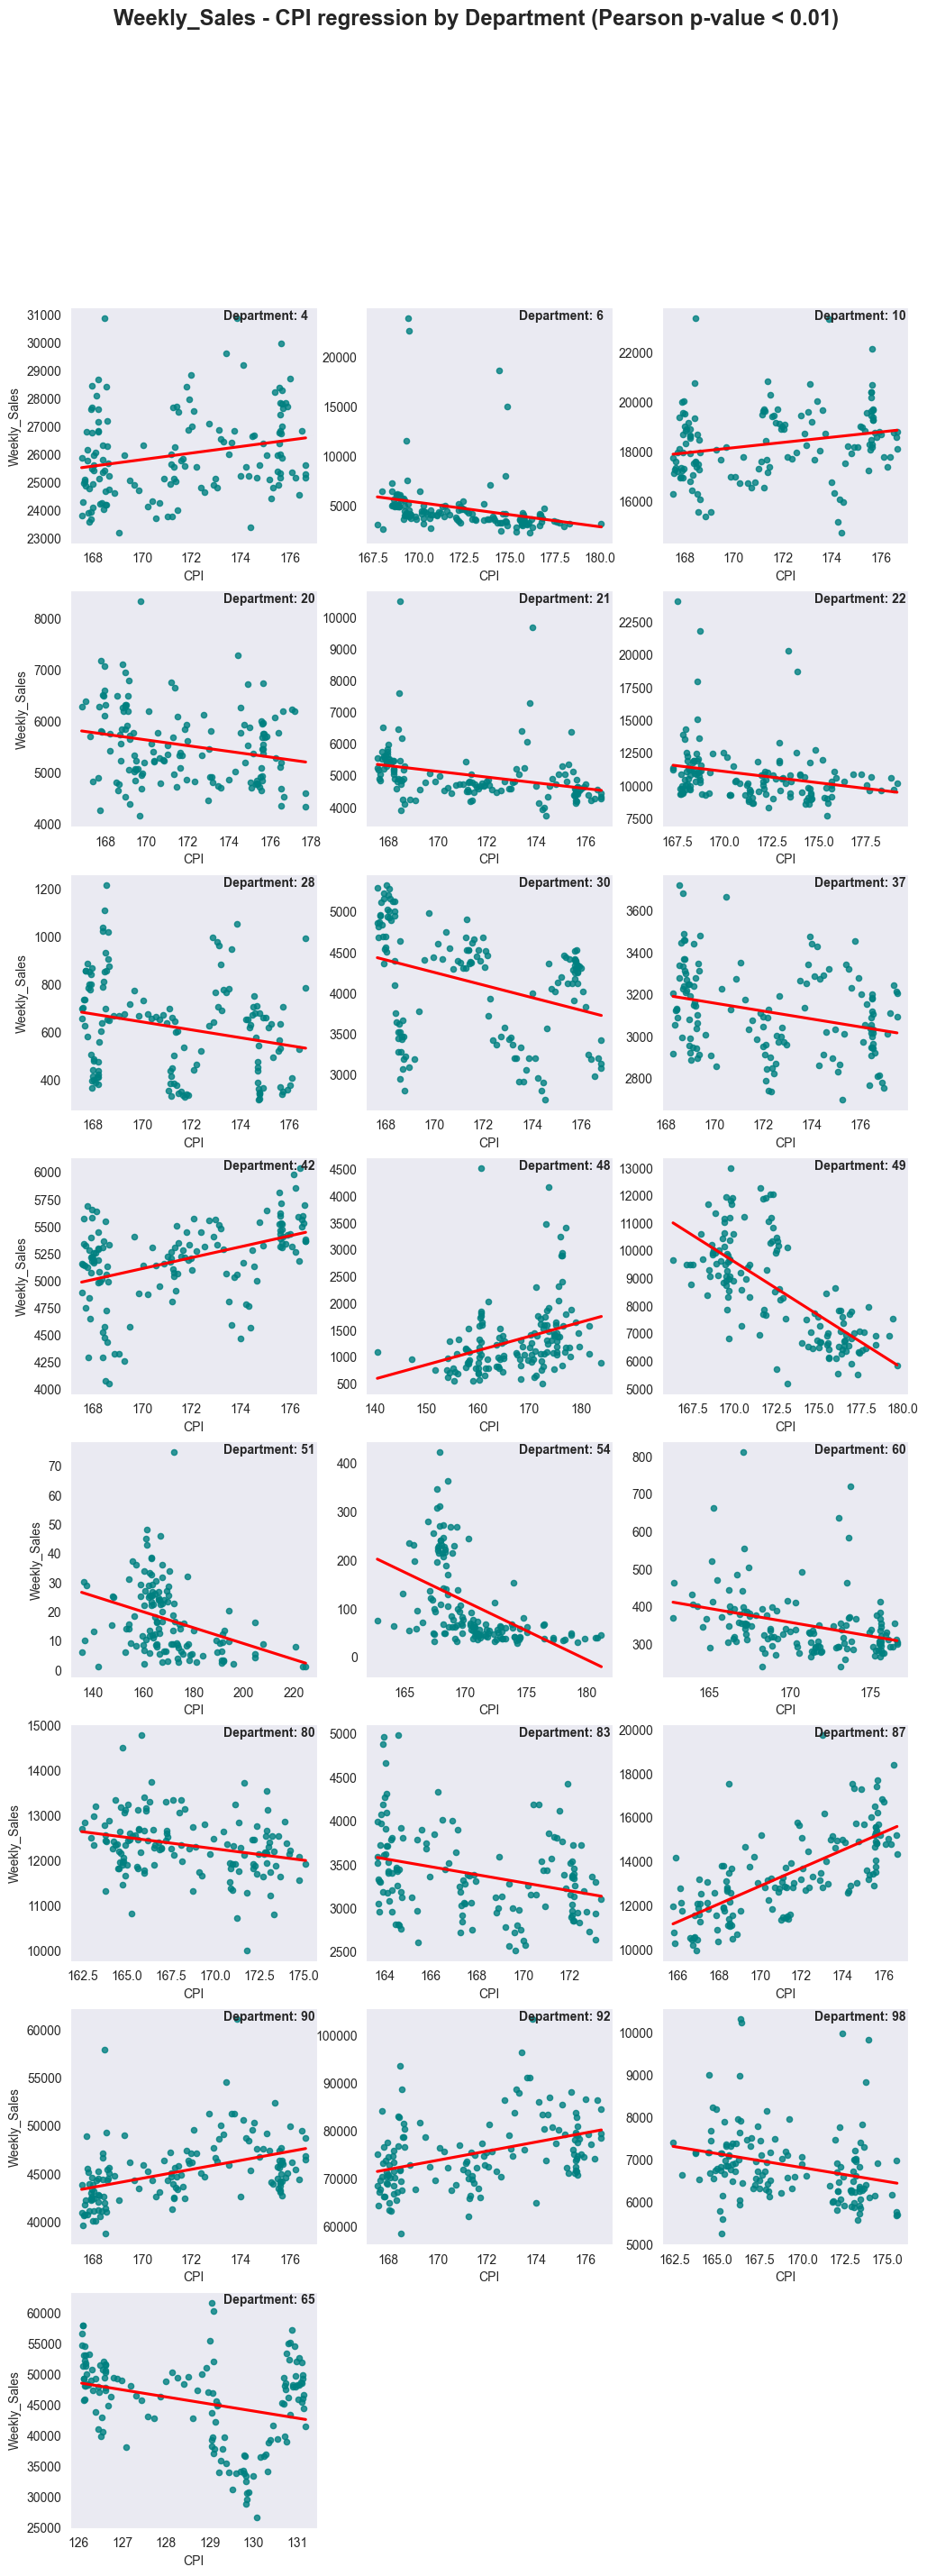

In [30]:
# Plot departments (regression plot) where CPI (Customer Price Indicator) is correlated to Weekly_Sales (p-value < 0.01)
scatter_regression_pearson('CPI')

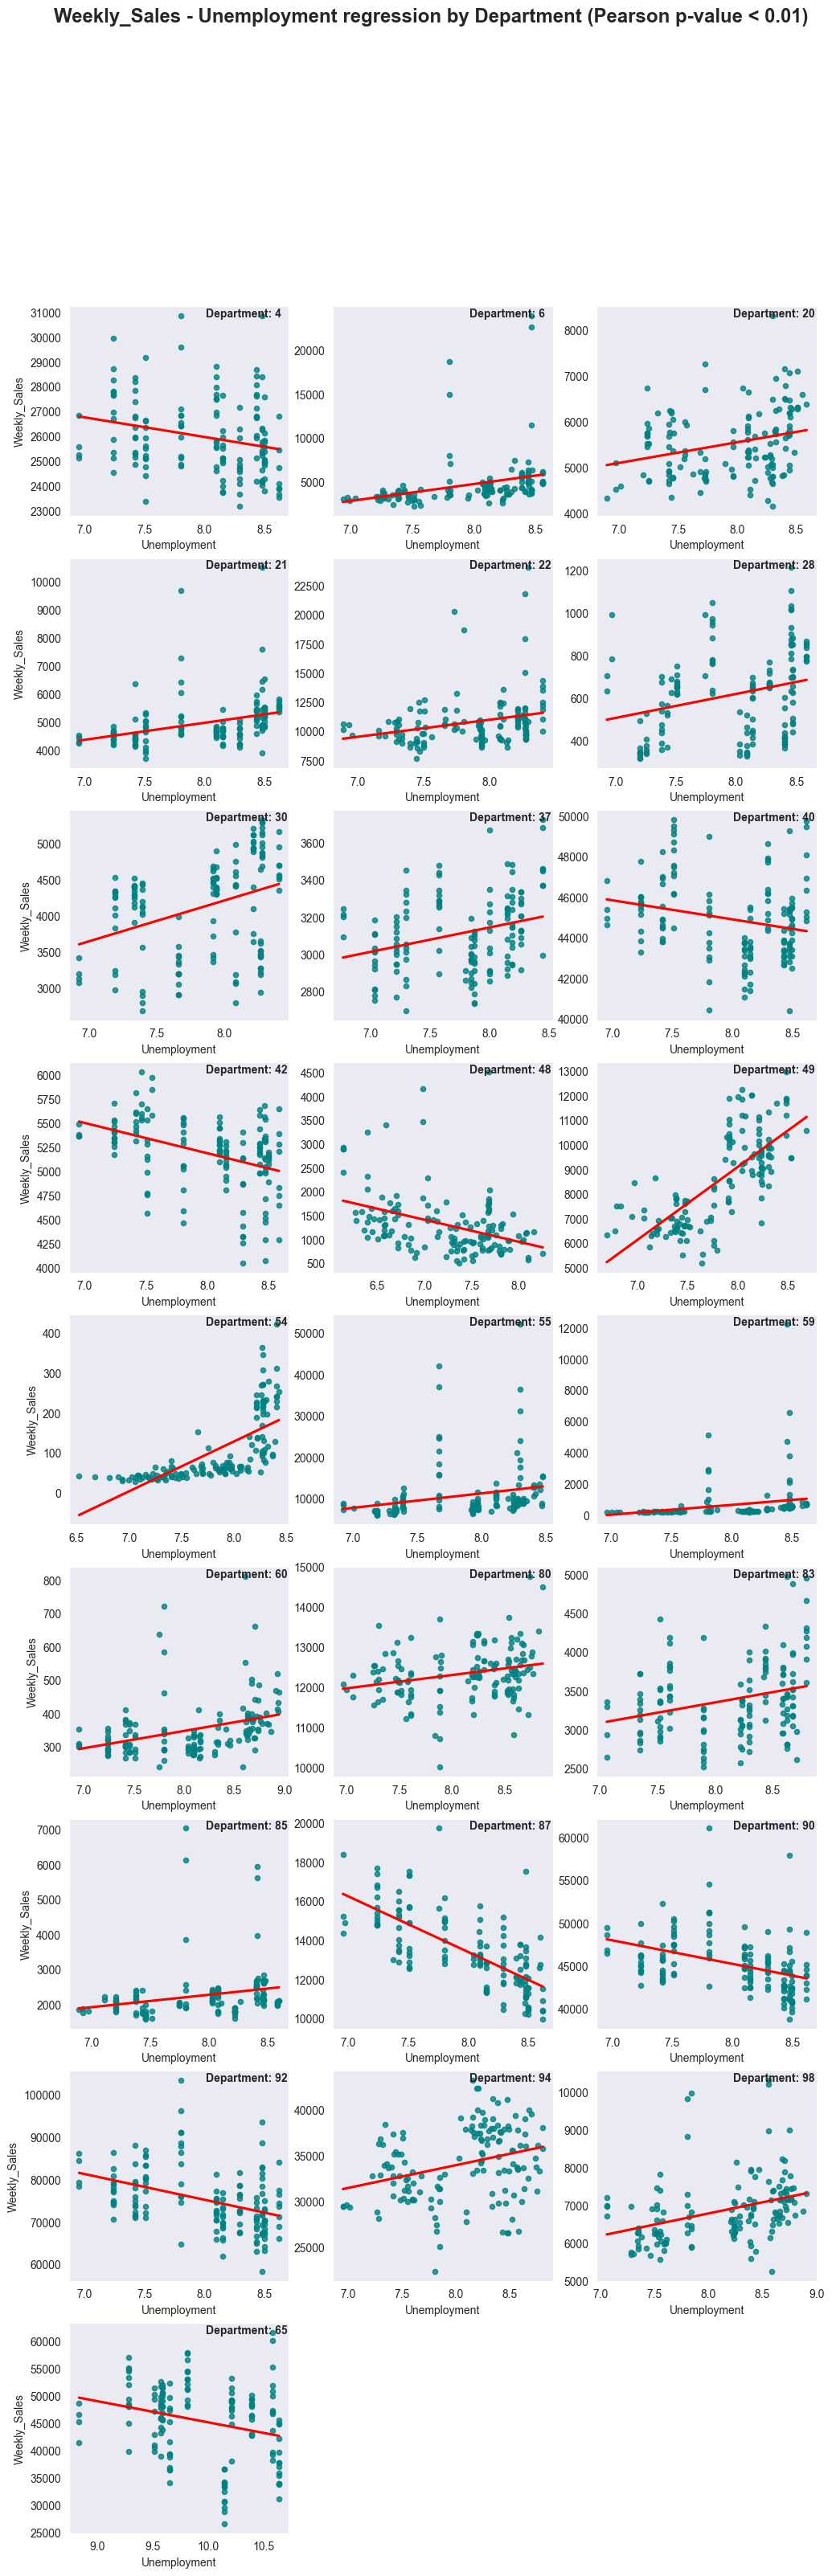

In [31]:
# Plot departments (regression plot) where Unemployment is correlated to Weekly_Sales (p-value < 0.01)
scatter_regression_pearson('Unemployment')

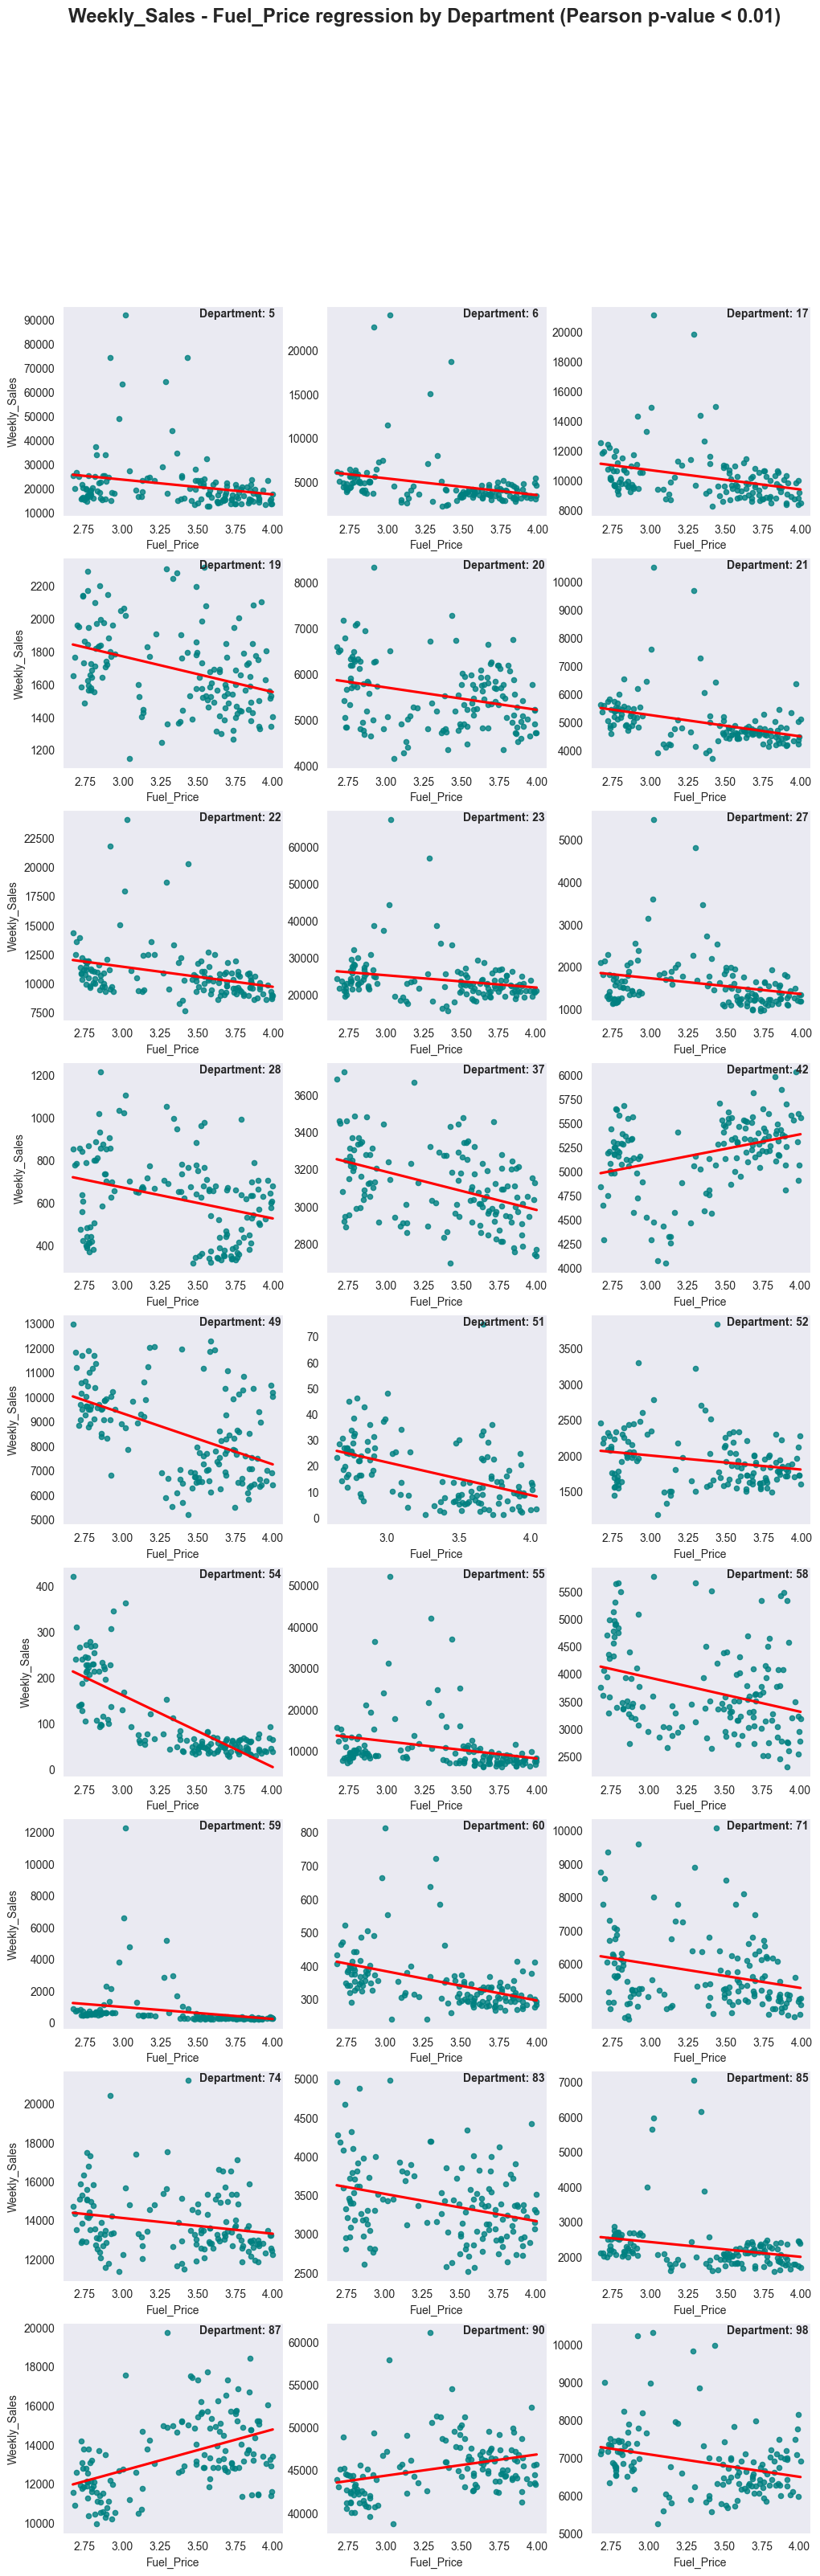

In [32]:
# Plot departments (regression plot) where Fuel_Price is correlated to Weekly_Sales (p-value < 0.01)
scatter_regression_pearson('Fuel_Price')

### Example Cases
***

In [50]:

def temporal_evolution_quan(dept,feature):
    sns.set_style('dark')
    x=data.loc[data.Dept==dept].groupby('Date').agg({'Temperature':'mean','Weekly_Sales':'mean','CPI':'mean','Unemployment':'mean','Fuel_Price':'mean'})

    fig,ax=plt.subplots(figsize=(12,4))
    ax.fill_between(x=x.index,y1=[0 for i in x.index],y2=x['Weekly_Sales'],color='darkblue',alpha=0.3)

    ax.set_ylabel('Weekly Sales',color='darkblue')
    ax.tick_params('y',colors='darkblue')
    ax.set_ylim(0,x.Weekly_Sales.max()+x.Weekly_Sales.max()*0.05)
    ax.set_xlim(x.index.min(),x.index.max())

    ax2=ax.twinx()
    ax2.plot(x[feature],'teal')
    ax2.set_ylabel(feature,color='teal')
    ax2.tick_params('y',colors='teal')
    plt.title(f'Evolution of Weekly Sales in Department {dept} vs {feature}')



def temporal_evolution_qual(dept,feature):
    sns.set_style('dark')
    x=data.loc[data.Dept==dept].groupby('Date').agg({'Weekly_Sales':'mean','IsHoliday':'mean'})

    fig,ax=plt.subplots(figsize=(12,4))
    ax.plot(x.index,x['Weekly_Sales'],color='darkblue')

    ax.set_ylabel('Weekly Sales',color='darkblue')
    ax.tick_params('y',colors='darkblue')
    ax.set_ylim(0,x.Weekly_Sales.max()+x.Weekly_Sales.max()*0.05)
    ax.set_xlim(x.index.min(),x.index.max())

    ax2=ax.twinx()
    ax2.bar(x.index,x[feature],color='teal',alpha=0.3,label='Holiday',width=7)
    ax2.set_ylabel(feature,color='teal')
    ax2.tick_params('y',colors='teal')
    ax2.set_ylim(0,1)
    plt.title(f'Evolution of Weekly Sales in Department {dept} with Holiday periods')


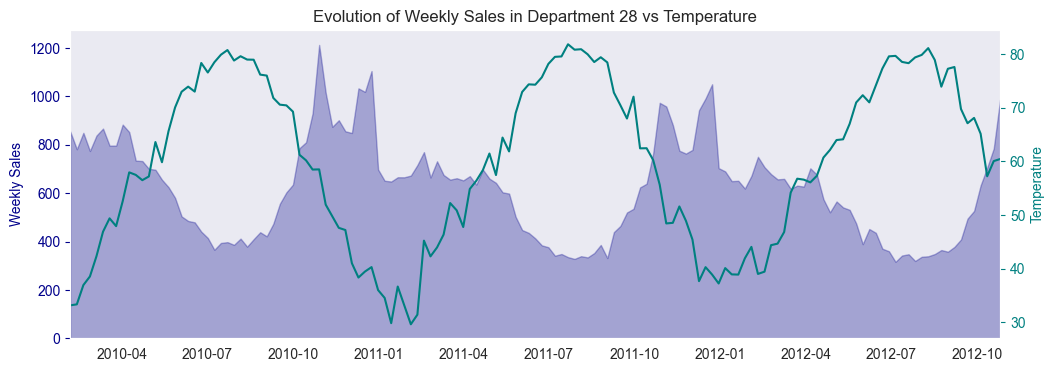

In [52]:
temporal_evolution_quan(28,'Temperature')

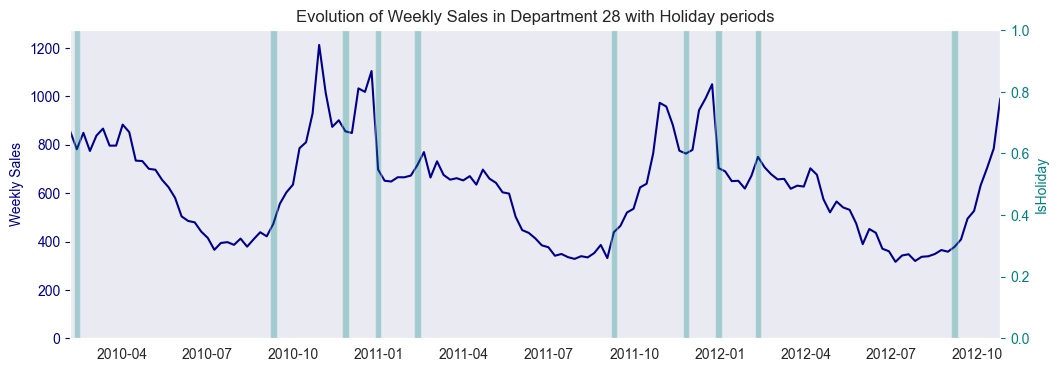

In [53]:
temporal_evolution_qual(28,'IsHoliday')

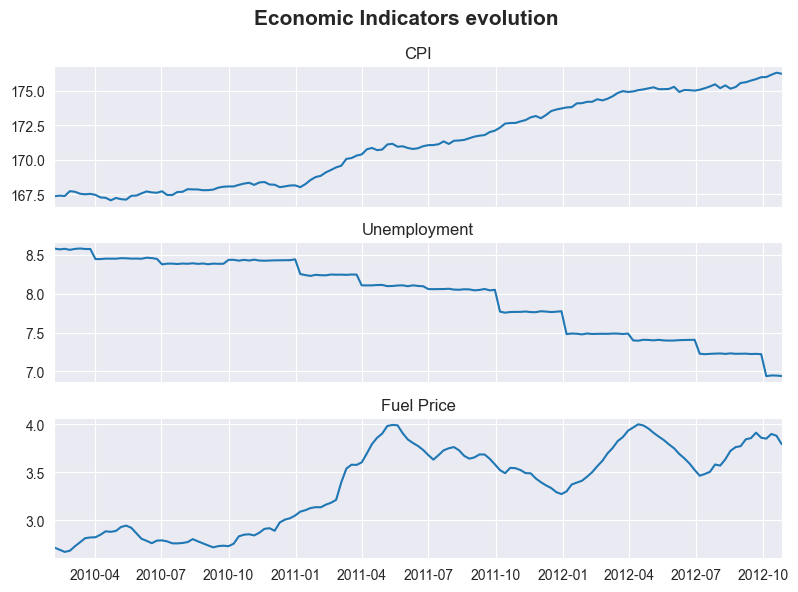

In [47]:
feat_evolution=data.groupby('Date').agg({'CPI':'mean','Fuel_Price':'mean','Unemployment':'mean'}).reset_index()
sns.set_style('darkgrid')
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(8,6))
fig.suptitle('Economic Indicators evolution',fontsize=15, fontweight='semibold')
ax1.plot(feat_evolution['Date'], feat_evolution['CPI'])
ax1.set_title('CPI')
ax1.set_xlim(feat_evolution['Date'].min(),feat_evolution['Date'].max())
ax2.plot(feat_evolution['Date'], feat_evolution['Unemployment'])
ax2.set_title('Unemployment')
ax3.plot(feat_evolution['Date'], feat_evolution['Fuel_Price'])
ax3.set_title('Fuel Price')
fig.tight_layout()


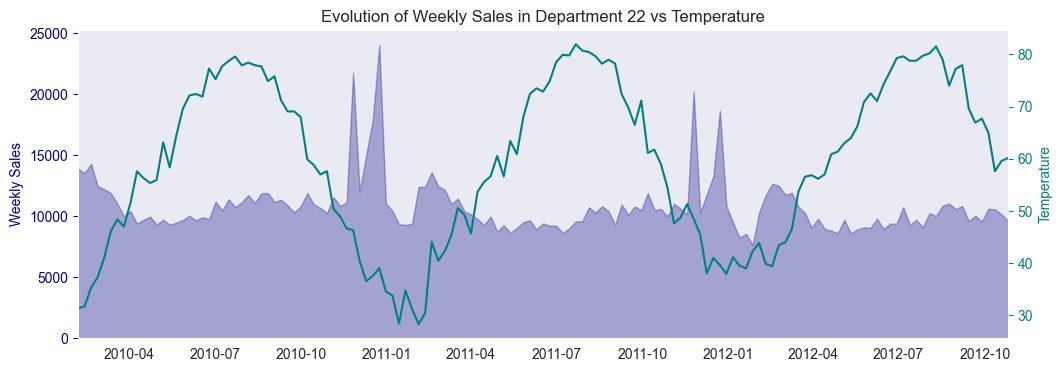

In [54]:
temporal_evolution_quan(22,'Temperature')

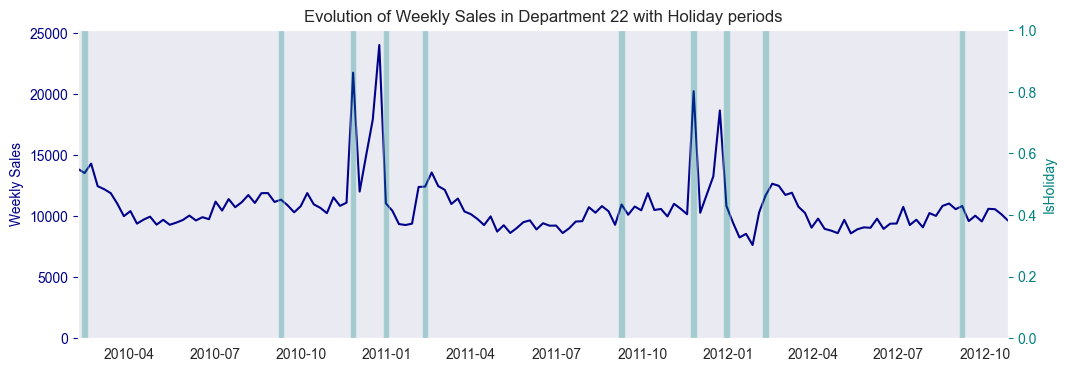

In [51]:
temporal_evolution_qual(22,'IsHoliday')